In [1]:
#import all needed Libraries
import torch
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
from torch import nn
from torch.utils.data import DataLoader

torch.__version__

'2.0.1+cu118'

In [2]:
#Device related Code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [4]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [5]:
#Getting the Data
train_data = datasets.Food101(root="data",
                              split="train",
                              download=True,
                              transform=data_transform,
                              target_transform=None)

test_data = datasets.Food101(root='data',
                              split="test",
                              download=True,
                              transform=data_transform,
                            )

100%|██████████| 4996278331/4996278331 [00:43<00:00, 116140584.98it/s]


Extracting data/food-101.tar.gz to data


In [6]:
print(f"Train_lenght-> {len(train_data)} | Test_Lenght-> {len(test_data)}")

Train_lenght-> 75750 | Test_Lenght-> 25250


In [7]:
#First Sample of The Data

image, label = train_data[0]
print("First Sample of The Data")
print(label)
image.shape

First Sample of The Data
23


torch.Size([3, 64, 64])

In [8]:
import os

def get_class_names_and_indices(dataset_path):
    class_names = []
    class_indices = {}

    # Assuming folder structure where each folder represents a class
    for index, class_name in enumerate(sorted(os.listdir(dataset_path))):
        class_names.append(class_name)
        class_indices[class_name] = index

    return class_names, class_indices

# Example usage
dataset_path = '/content/data/food-101/images'
class_names, class_indices = get_class_names_and_indices(dataset_path)

# Print class names and class indices
for class_name, class_index in zip(class_names, class_indices.values()):
    print(f"{class_name},")


apple_pie,
baby_back_ribs,
baklava,
beef_carpaccio,
beef_tartare,
beet_salad,
beignets,
bibimbap,
bread_pudding,
breakfast_burrito,
bruschetta,
caesar_salad,
cannoli,
caprese_salad,
carrot_cake,
ceviche,
cheese_plate,
cheesecake,
chicken_curry,
chicken_quesadilla,
chicken_wings,
chocolate_cake,
chocolate_mousse,
churros,
clam_chowder,
club_sandwich,
crab_cakes,
creme_brulee,
croque_madame,
cup_cakes,
deviled_eggs,
donuts,
dumplings,
edamame,
eggs_benedict,
escargots,
falafel,
filet_mignon,
fish_and_chips,
foie_gras,
french_fries,
french_onion_soup,
french_toast,
fried_calamari,
fried_rice,
frozen_yogurt,
garlic_bread,
gnocchi,
greek_salad,
grilled_cheese_sandwich,
grilled_salmon,
guacamole,
gyoza,
hamburger,
hot_and_sour_soup,
hot_dog,
huevos_rancheros,
hummus,
ice_cream,
lasagna,
lobster_bisque,
lobster_roll_sandwich,
macaroni_and_cheese,
macarons,
miso_soup,
mussels,
nachos,
omelette,
onion_rings,
oysters,
pad_thai,
paella,
pancakes,
panna_cotta,
peking_duck,
pho,
pizza,
pork_chop,
p

In [9]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.9725, 0.9725, 0.9765,  ..., 0.4745, 0.3765, 0.3843],
         [0.9765, 0.9765, 0.9725,  ..., 0.4980, 0.3882, 0.4157],
         [0.9725, 0.9725, 0.9765,  ..., 0.5529, 0.4941, 0.4588],
         ...,
         [0.6314, 0.6627, 0.6392,  ..., 0.6118, 0.4980, 0.4824],
         [0.6235, 0.6314, 0.6235,  ..., 0.5059, 0.4980, 0.5098],
         [0.5961, 0.5961, 0.6118,  ..., 0.5020, 0.5294, 0.5608]],

        [[0.9569, 0.9490, 0.9569,  ..., 0.1922, 0.1333, 0.1490],
         [0.9569, 0.9529, 0.9529,  ..., 0.2078, 0.1451, 0.1647],
         [0.9529, 0.9529, 0.9569,  ..., 0.2314, 0.2039, 0.1765],
         ...,
         [0.3137, 0.3451, 0.3216,  ..., 0.5529, 0.4235, 0.4078],
         [0.3098, 0.3176, 0.3059,  ..., 0.4431, 0.4314, 0.4510],
         [0.2902, 0.2941, 0.2941,  ..., 0.4510, 0.4667, 0.5098]],

        [[0.9608, 0.9569, 0.9529,  ..., 0.1137, 0.0824, 0.0863],
         [0.9608, 0.9569, 0.9529,  ..., 0.0980, 0.0667, 0.0863],
         [0.9529, 0.9529, 0.9529,  ..., 0.10

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


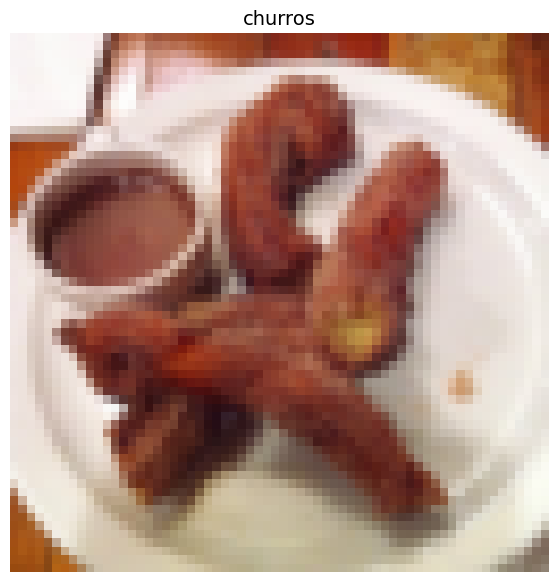

In [10]:
img_permute = img.permute(1, 2, 0)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);


In [22]:
NUM_WORKERS = os.cpu_count()
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb9664fac50>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb87e507eb0>)

In [23]:
print(f"Train->{len(train_dataloader)} of 32 images to train| Test->{len(test_dataloader)} of 32 images to test")

Train->2368 of 32 images to train| Test->790 of 32 images to test


In [25]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [26]:
import random

def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

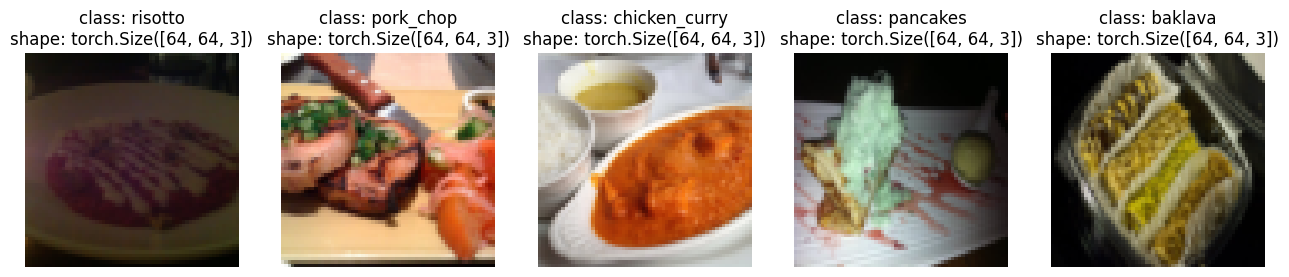

In [27]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=42)

In [29]:
#lets build our model
import torchvision.models as models

# Import ResNet model
model_1 = models.resnet50(pretrained=True)

model_1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [43]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")


model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-2.3262,  0.0191, -3.7812, -0.9762, -1.4414,  1.4407, -1.9916, -2.8431,
         -4.4206, -1.1581, -1.7487, -2.7374, -1.5719, -1.0357, -1.3314, -2.8785,
         -1.5378, -2.4404, -1.6354, -0.9188, -0.8348, -2.8761, -1.9549, -2.1294,
         -2.8030, -2.6798, -1.5300, -3.2353, -3.1684, -1.0191, -4.0757, -3.7171,
         -2.6349,  0.1152,  1.1502, -2.6684,  0.0400, -3.0390, -0.1274, -3.2532,
         -3.1541, -3.9975, -2.5219, -1.8570, -5.0735, -0.7405, -4.0420,  2.7360,
         -3.9295, -3.7680, -3.5480, -0.7418,  0.0785, -1.6476, -0.3421, -0.3048,
         -0.2264, -4.6607, -0.0786,  0.2762,  0.4927,  1.4515,  1.3321, -0.1994,
          1.3987, -0.5603,  3.1028,  2.3172,  1.1449,  5.0063,  0.0437, -0.4380,
         -0.3660,  1.6244, -1.6239,  1.2528, -2.2074, -2.1939,  3.2788,  1.3938,
          1.9919, -0.1849, -3.5436,  0.1066, -2.4010, -0.5994, -1.5908,  0.6133,
         -1.4915, -0.7836, -5.5358, -3.4541, -

In [44]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 256, 16, 16]          --
│    └─Bottleneck: 2-1                   [1, 256, 16, 16]          --
│    │    └─Conv2d: 3-1                  [1, 64, 16, 16]           4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-3                    [1, 64, 16, 16]           --
│    │    └─Conv2d: 3-4                  [1, 64, 16, 16]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 16, 16]           128
│    │    └─ReLU: 3-6                    [1, 64, 16, 16]           --
│ 

In [45]:

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [46]:

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [61]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [49]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

model_1

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.7783 | train_acc: 0.1465 | test_loss: 3.6819 | test_acc: 0.1934
Epoch: 2 | train_loss: 2.9735 | train_acc: 0.2804 | test_loss: 3.3720 | test_acc: 0.2330
Epoch: 3 | train_loss: 2.6147 | train_acc: 0.3525 | test_loss: 3.3047 | test_acc: 0.2602
Epoch: 4 | train_loss: 2.3387 | train_acc: 0.4106 | test_loss: 2.3552 | test_acc: 0.4119
Epoch: 5 | train_loss: 2.1211 | train_acc: 0.4564 | test_loss: 2.6840 | test_acc: 0.4244
Total training time: 2797.130 seconds


In [63]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [64]:
model_0_results

{'train_loss': [3.7783454779434846,
  2.97346172673074,
  2.6146992912163607,
  2.338745784115147,
  2.121065627129094],
 'train_acc': [0.1464623803490991,
  0.28036581503378377,
  0.3524774774774775,
  0.4106005419481982,
  0.456446192286036],
 'test_loss': [3.6818708090842525,
  3.3719747009156626,
  3.3046578891669647,
  2.355163353681564,
  2.684018243075926],
 'test_acc': [0.19339398734177216,
  0.23299050632911392,
  0.26016613924050636,
  0.41194620253164554,
  0.4243670886075949]}

In [72]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    print("loss-",loss)

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

loss- [3.7783454779434846, 2.97346172673074, 2.6146992912163607, 2.338745784115147, 2.121065627129094]


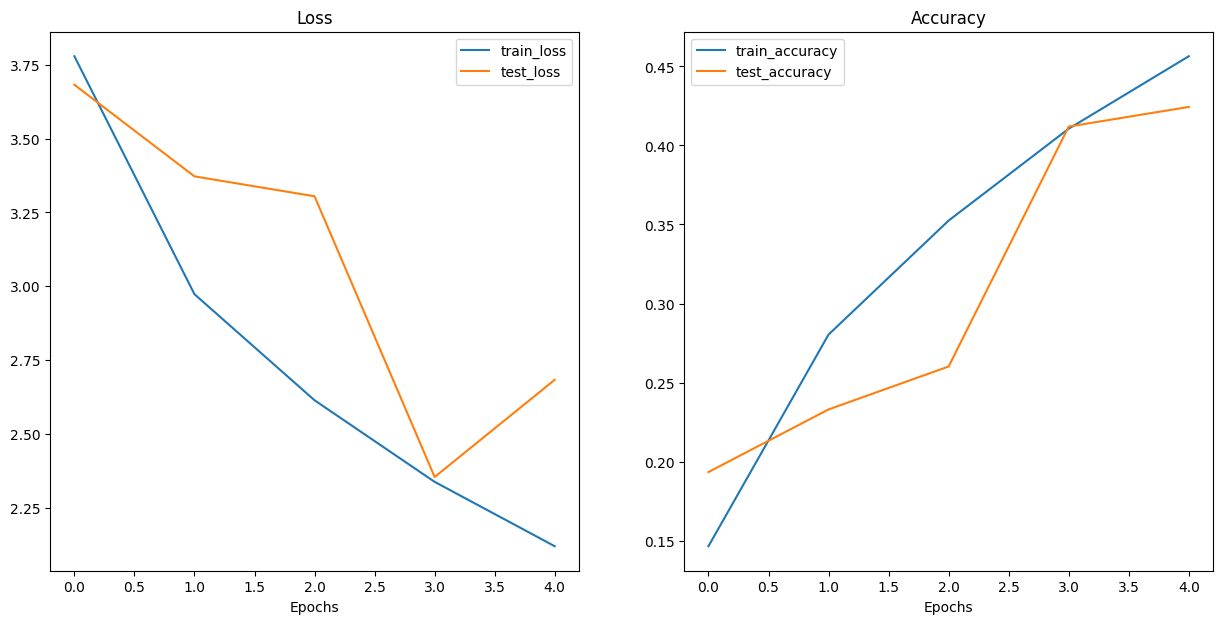

In [73]:
plot_loss_curves(model_0_results)

In [75]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [76]:
#Getting the Data
train_data_augmented = datasets.Food101(root="data",
                              split="train",
                              download=True,
                              transform=train_transform_trivial_augment,
                              target_transform=None)

test_data_augmented = datasets.Food101(root='data',
                              split="test",
                              download=True,
                              transform=test_transform,
                            )

In [78]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_augmented,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fb87d0898a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb87e507eb0>)

In [79]:
model_1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [80]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.5677 | train_acc: 0.3683 | test_loss: 2.6509 | test_acc: 0.3631
Epoch: 2 | train_loss: 2.4285 | train_acc: 0.3976 | test_loss: 2.1948 | test_acc: 0.4440
Epoch: 3 | train_loss: 2.2947 | train_acc: 0.4268 | test_loss: 2.4587 | test_acc: 0.4301
Epoch: 4 | train_loss: 2.1742 | train_acc: 0.4516 | test_loss: 2.1027 | test_acc: 0.4700
Epoch: 5 | train_loss: 2.0485 | train_acc: 0.4799 | test_loss: 1.9940 | test_acc: 0.5004
Total training time: 2817.349 seconds


In [82]:
import torchvision

custom_image_path = '/content/04-pizza-dad.jpeg'
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [83]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: ignored

In [87]:
import torchvision

custom_image_path = '/content/04-pizza-dad.jpeg'
# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image_uint8 = custom_image_uint8 / 255

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

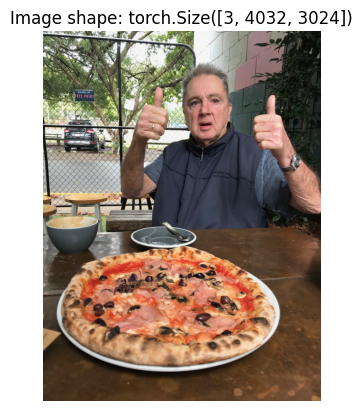

In [89]:
# Plot custom image
plt.imshow(custom_image_uint8.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image_uint8.shape}")
plt.axis(False);

In [91]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
# Transform target image
custom_image_transformed = custom_image_transform(custom_image_uint8)

# Print out original shape and new shape
print(f"Original shape: {custom_image_uint8.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [92]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed)

RuntimeError: ignored

In [93]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

ValueError: ignored

In [94]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [95]:
custom_image_pred

tensor([[ -0.6939,  -1.0799,  -1.2775,  -2.6069,  -2.9280,  -3.6952,  -0.2654,
          -3.4064,  -2.2672,  -2.0000,  -2.7042,  -3.9501,  -0.9623,  -2.9239,
          -1.1957,  -2.5467,  -1.8320,  -0.8532,  -3.2993,  -2.6675,  -1.6143,
           0.0383,  -0.4970,  -1.2694,  -0.6464,  -1.9588,  -3.6319,  -1.5360,
          -2.7034,   0.4181,  -2.7494,   0.1740,  -2.8648,  -1.5943,  -4.0849,
          -3.1631,  -2.7349,  -3.8545,  -2.5947,  -1.9644,  -1.3037,  -3.2318,
          -2.7547,  -2.0789,  -1.1997,   0.0427,  -1.3495,  -1.9230,  -3.6789,
          -1.9296,  -4.3114,  -2.6528,  -3.0926,  -0.4947,  -3.5778,  -0.6530,
          -3.0160,  -2.0642,  -0.2748,  -2.1963,  -1.7213,  -1.7686,  -2.5690,
           0.4675,  -2.3552,  -2.5810,  -3.5604,  -3.0361,  -1.2637,  -2.7791,
          -2.0136,  -0.8831,  -1.6830,  -2.0612,  -2.7689,  -2.9458,   0.2856,
          -3.4499,  -0.9473,  -2.1975,  -1.9279,  -2.5552,  -2.9438,   0.1628,
          -1.3663,  -2.8425,  -4.0533,  -2.9295,  -3

In [96]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ -0.6939,  -1.0799,  -1.2775,  -2.6069,  -2.9280,  -3.6952,  -0.2654,
          -3.4064,  -2.2672,  -2.0000,  -2.7042,  -3.9501,  -0.9623,  -2.9239,
          -1.1957,  -2.5467,  -1.8320,  -0.8532,  -3.2993,  -2.6675,  -1.6143,
           0.0383,  -0.4970,  -1.2694,  -0.6464,  -1.9588,  -3.6319,  -1.5360,
          -2.7034,   0.4181,  -2.7494,   0.1740,  -2.8648,  -1.5943,  -4.0849,
          -3.1631,  -2.7349,  -3.8545,  -2.5947,  -1.9644,  -1.3037,  -3.2318,
          -2.7547,  -2.0789,  -1.1997,   0.0427,  -1.3495,  -1.9230,  -3.6789,
          -1.9296,  -4.3114,  -2.6528,  -3.0926,  -0.4947,  -3.5778,  -0.6530,
          -3.0160,  -2.0642,  -0.2748,  -2.1963,  -1.7213,  -1.7686,  -2.5690,
           0.4675,  -2.3552,  -2.5810,  -3.5604,  -3.0361,  -1.2637,  -2.7791,
          -2.0136,  -0.8831,  -1.6830,  -2.0612,  -2.7689,  -2.9458,   0.2856,
          -3.4499,  -0.9473,  -2.1975,  -1.9279,  -2.5552,  -2.9438,   0.1628,
          -1.3663,  -2.8425,  -4.

In [97]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'macarons'

In [98]:
custom_image_pred_probs

tensor([[1.9864e-02, 1.3502e-02, 1.1081e-02, 2.9326e-03, 2.1272e-03, 9.8766e-04,
         3.0489e-02, 1.3183e-03, 4.1189e-03, 5.3807e-03, 2.6606e-03, 7.6542e-04,
         1.5187e-02, 2.1358e-03, 1.2026e-02, 3.1147e-03, 6.3646e-03, 1.6939e-02,
         1.4673e-03, 2.7603e-03, 7.9131e-03, 4.1311e-02, 2.4187e-02, 1.1172e-02,
         2.0829e-02, 5.6066e-03, 1.0522e-03, 8.5575e-03, 2.6629e-03, 6.0397e-02,
         2.5431e-03, 4.7313e-02, 2.2660e-03, 8.0730e-03, 6.6891e-04, 1.6815e-03,
         2.5803e-03, 8.4221e-04, 2.9686e-03, 5.5758e-03, 1.0795e-02, 1.5698e-03,
         2.5297e-03, 4.9725e-03, 1.1978e-02, 4.1491e-02, 1.0312e-02, 5.8110e-03,
         1.0039e-03, 5.7732e-03, 5.3334e-04, 2.8011e-03, 1.8044e-03, 2.4242e-02,
         1.1107e-03, 2.0692e-02, 1.9480e-03, 5.0462e-03, 3.0206e-02, 4.4213e-03,
         7.1096e-03, 6.7816e-03, 3.0457e-03, 6.3452e-02, 3.7717e-03, 3.0095e-03,
         1.1302e-03, 1.9093e-03, 1.1235e-02, 2.4687e-03, 5.3076e-03, 1.6440e-02,
         7.3878e-03, 5.0610e

In [99]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

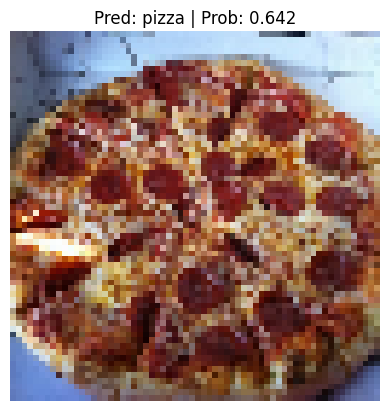

In [102]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path='/content/data/food-101/images/pizza/1001116.jpg',
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

>This model can be improved however it is correctly predicting pizza


In [ ]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
train_data_1 = datasets.Food101(root="data",
                              split="train",
                              download=True,
                              transform=simple_transform,
                              target_transform=None)

test_data_1 = datasets.Food101(root='data',
                              split="test",
                              download=True,
                              transform=simple_transform,
                            )

In [ ]:
train_dataloader_1 = DataLoader(dataset=train_data_1,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True
                              )

test_dataloader_1 = DataLoader(dataset=test_data_1,
                              batch_size=1,
                              num_workers=1,
                              shuffle=False
                              )

train_dataloader_1, test_dataloader_1

(<torch.utils.data.dataloader.DataLoader at 0x7f342db38730>,
 <torch.utils.data.dataloader.DataLoader at 0x7f342db38eb0>)

In [ ]:
#model_1
class Model_1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
        )
    self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

  def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_1 = Model_1(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_1


Model_1(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=101, bias=True)
  )
)

In [ ]:
img_batch, label_batch = next(iter(train_dataloader_1))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single.to(device))


print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0562,  0.0615,  0.0203, -0.0383, -0.0503,  0.0643, -0.0732,  0.0769,
         -0.0166,  0.0650, -0.0283, -0.0373,  0.0153, -0.0425,  0.0548, -0.0029,
         -0.0081,  0.0326,  0.0030,  0.0697, -0.0106, -0.0482,  0.0483, -0.0231,
          0.0219,  0.0939,  0.0076,  0.0538,  0.0251, -0.0300, -0.0110,  0.0669,
          0.0282, -0.0951, -0.0160, -0.0115, -0.0409, -0.0365,  0.0103, -0.0235,
          0.0069, -0.0152,  0.0187,  0.0499, -0.0408,  0.0014,  0.0635,  0.0434,
          0.0322,  0.0306,  0.0021, -0.0577, -0.0349,  0.0544,  0.0075, -0.0310,
          0.0135,  0.0506,  0.0149,  0.0023, -0.0523,  0.0239, -0.0109, -0.0348,
          0.0017,  0.0694, -0.0131,  0.0280,  0.0257,  0.0393,  0.0272, -0.0501,
         -0.0350,  0.0058,  0.0616,  0.0024,  0.0716, -0.0225, -0.0058, -0.0340,
         -0.0073, -0.0015, -0.0093,  0.0563, -0.0341,  0.0227,  0.0226, -0.0045,
         -0.0334, -0.0078, -0.0863,  0.0973,  

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
Model_1                                  [1, 101]                  --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_1 = Model_1(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
print("Training Starts")
model_0_results = train(model=model_1,
                        train_dataloader=train_dataloader_1,
                        test_dataloader=test_dataloader_1,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print("Training Ends")
print(f"Total training time: {end_time-start_time:.3f} seconds")

Training Starts


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.6184 | train_acc: 0.0095 | test_loss: 4.6170 | test_acc: 0.0099
Epoch: 2 | train_loss: 4.6183 | train_acc: 0.0098 | test_loss: 4.6171 | test_acc: 0.0099
Epoch: 3 | train_loss: 4.6184 | train_acc: 0.0095 | test_loss: 4.6167 | test_acc: 0.0099


Image shape: torch.Size([3, 64, 64])


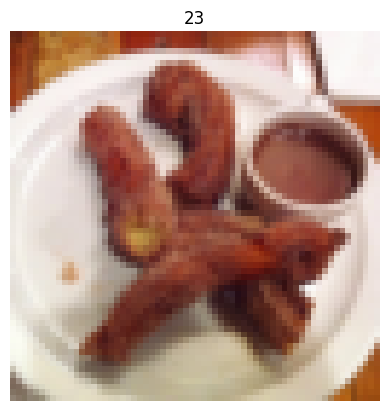

In [ ]:
#visualing the first sample
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1, 2, 0)) # image shape is [1, 28, 28] (colour channels, height, width) # matplotlib expects coreect shape
plt.axis(False)
plt.title(label);

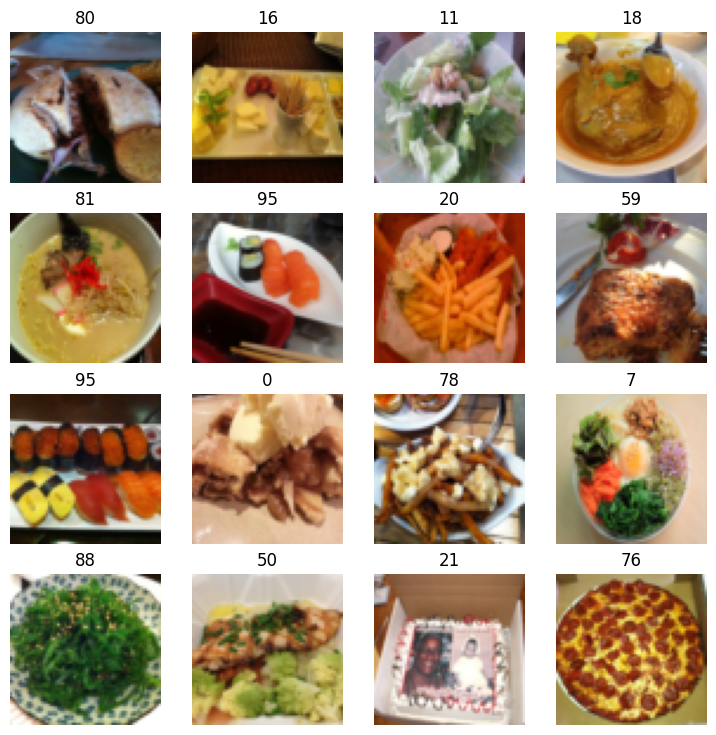

In [ ]:
#visualing
#Just see more images using simple loops

# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(label)
    plt.axis(False);

In [ ]:
images, labels = train_data[0]
images.shape

torch.Size([3, 64, 64])

In [ ]:
#now since data is huge lets craete batches for the data and feed to the model so for that we use dataloader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)


print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 2368 batches of 32
Length of test dataloader: 790 batches of 32


In [ ]:


# # Assuming dataloader is your DataLoader object

# for data in train_dataloader:
#     images, labels = data
#     list = []
#     # Process the data samples
#     # ...

#     # Example: Print the shapes of the images and labels
#     print("Batch of samples:")
#     print("Images shape:", images.shape)
#     list.append(images.shape)
#     print("Labels shape:", labels.shape)
#     print(list[0])


Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 3, 64, 64])
Labels shape: torch.Size([32])
torch.Size([32, 3, 64, 64])
Batch of samples:
Images shape: torch.Size([32, 

KeyboardInterrupt: ignored

In [ ]:
#Making the CNN model
class FoodRecognisingModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=hidden_units),
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x



In [ ]:


model_cnn = FoodRecognisingModel(input_shape=3,
                                 hidden_units=10,
                                 output_shape=len(class_folders)).to(device)

model_cnn

FoodRecognisingModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

In [ ]:
#Defining Loss Optimizer Accuracy
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.01)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
#Building a Training Loop and Testing Loop
torch.manual_seed(42)

def train_function(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device = device):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_function(data_loader: torch.utils.data.DataLoader,
                  model: torch.nn.Module,
                  loss_fn: torch.nn.Module,
                  accuracy_fn,
                  device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")



In [ ]:
#Training the model to data
torch.manual_seed(42)

epochs = 5

for epoch in range(epochs):
  print(f"Epoch = {epoch}")
  train_function(model=model_cnn,
                 data_loader=train_dataloader,
                 loss_fn=loss_fn,
                 optimizer=optimizer,
                 accuracy_fn=accuracy_fn)

  test_function(data_loader=test_dataloader,
                model=model_cnn,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn)

Epoch = 0


IndexError: ignored